In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anastasiafirsova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
from nltk.corpus import wordnet as wn

In [54]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/anastasiafirsova/nltk_data...


True

In [264]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

# Получение синсета 'search.v.01'
synset = wn.synset('search.v.01')
print (synset)

Synset('search.v.01')


In [265]:
# Извлечение списков лемм для всех языков из базы данных
lemmas_by_lang = {}
for lang in wn.langs():
    lemmas_by_lang[lang] = synset.lemma_names(lang)

# Составление списка всех лемм
all_lemmas = list(itertools.chain.from_iterable(lemmas_by_lang.values()))

print(all_lemmas)

['search', 'seek', 'look_for', 'gjurmim', 'kërkim', 'kërkoj', 'استشار', 'استكشف', 'اكتشف', 'بحث', 'بحث_في', 'تقصى', 'حاول', 'حاول_إيجاد', 'سبر', 'سعى_لعمل_شئ', 'طلب', 'طمح_في', 'فتش', 'فحص', 'قصد', 'търся', '寻找', '寻觅', '找', '找寻', '搜寻', '搜查', '搜索', 'lede', 'søge', 'ψάχνω', 'etsiä', 'chercher', 'rechercher', 'חִפֵּשׂ', 'potražiti', 'pretražiti', 'pretraživati', 'tragati', 'tražiti', 'leita_að', 'leita_eftir', 'cercare', 'さがし回る', '尋ねる', '捜しもとめる', '捜し求める', '捜す', '捜索+する', '探しまわる', '探しもとめる', '探し回る', '探し求める', '探す', '探る', 'buscar', 'cercar', 'escorcollar', 'arakatu', 'erregistratu', 'miatu', 'buscar', 'explorar', 'rexistrar', 'buscar', 'explorar', 'registrar', 'cari', 'geledah', 'memeriksa', 'mencari', 'mengacar', 'mengemong', 'menggeledah', 'menyeluk', 'meraba-raba', 'merisik', 'merosok', 'merunjang', 'cari', 'memeriksa', 'mencari', 'mengacar', 'mengemong', 'menggeledah', 'menyeluk', 'meraba-raba', 'merisik', 'merosok', 'merunjang', 'rondzien', 'zoeken', 'leite', 'søke', 'lete', 'søke', 'busc

In [266]:
# Создание списка синсетов для каждой леммы
synsets_by_lemma = {}
for lang, lemmas in lemmas_by_lang.items():
    for lemma in lemmas:
        synsets = wn.synsets(lemma, lang=lang)
        synsets_by_lemma[lemma] = synsets
        
print (synsets_by_lemma)

{'search': [Synset('search.n.01'), Synset('search.n.02'), Synset('search.n.03'), Synset('search.n.04'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.v.02'), Synset('research.v.02'), Synset('search.v.04')], 'seek': [Synset('seek.n.01'), Synset('seek.v.01'), Synset('search.v.01'), Synset('try.v.01'), Synset('seek.v.04'), Synset('seek.v.05')], 'look_for': [Synset('search.v.01'), Synset('anticipate.v.05')], 'gjurmim': [Synset('search.n.05'), Synset('search.v.01')], 'kërkim': [Synset('pursuit.n.01'), Synset('investigation.n.02'), Synset('research.n.01'), Synset('search.n.02'), Synset('dredge.v.02'), Synset('search.v.01'), Synset('search.v.04'), Synset('look.v.01'), Synset('search.n.04'), Synset('question.n.01')], 'kërkoj': [Synset('ask.v.04'), Synset('investigate.v.02'), Synset('search.n.01'), Synset('invite.v.07'), Synset('search.v.01'), Synset('comb.v.02'), Synset('put_on.v.07'), Synset('invite.v.01'), Synset('desire.v.01'), Synset('chase.v.01'), Synset('search.n.03')], 'ا

In [267]:
# Сращение синсетов в один массив
all_synsets = []
for synsets in synsets_by_lemma.values():
    for synset in synsets:
        all_synsets.append(synset)
    
print(all_synsets)

[Synset('search.n.01'), Synset('search.n.02'), Synset('search.n.03'), Synset('search.n.04'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.v.02'), Synset('research.v.02'), Synset('search.v.04'), Synset('seek.n.01'), Synset('seek.v.01'), Synset('search.v.01'), Synset('try.v.01'), Synset('seek.v.04'), Synset('seek.v.05'), Synset('search.v.01'), Synset('anticipate.v.05'), Synset('search.n.05'), Synset('search.v.01'), Synset('pursuit.n.01'), Synset('investigation.n.02'), Synset('research.n.01'), Synset('search.n.02'), Synset('dredge.v.02'), Synset('search.v.01'), Synset('search.v.04'), Synset('look.v.01'), Synset('search.n.04'), Synset('question.n.01'), Synset('ask.v.04'), Synset('investigate.v.02'), Synset('search.n.01'), Synset('invite.v.07'), Synset('search.v.01'), Synset('comb.v.02'), Synset('put_on.v.07'), Synset('invite.v.01'), Synset('desire.v.01'), Synset('chase.v.01'), Synset('search.n.03'), Synset('refer.v.03'), Synset('rede.v.02'), Synset('consult.v.01'), Synset('

### Граф №1

In [268]:
# Удаление лишних синсетов
filtered_synsets = []

for synset in all_synsets:
    if all_synsets.count(synset) > 3:
        filtered_synsets.append(synset)
        
print (filtered_synsets)

[Synset('search.n.01'), Synset('search.n.02'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.v.02'), Synset('research.v.02'), Synset('search.v.04'), Synset('seek.v.01'), Synset('search.v.01'), Synset('try.v.01'), Synset('seek.v.05'), Synset('search.v.01'), Synset('anticipate.v.05'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.n.02'), Synset('dredge.v.02'), Synset('search.v.01'), Synset('search.v.04'), Synset('investigate.v.02'), Synset('search.n.01'), Synset('search.v.01'), Synset('comb.v.02'), Synset('search.v.01'), Synset('search.v.04'), Synset('search.v.01'), Synset('search.v.04'), Synset('learn.v.04'), Synset('search.v.01'), Synset('search.v.04'), Synset('learn.v.04'), Synset('analyze.v.01'), Synset('investigate.v.02'), Synset('probe.v.01'), Synset('investigate.v.01'), Synset('search.v.01'), Synset('search.v.04'), Synset('examine.v.02'), Synset('size_up.v.01'), Synset('try.v.01'), Synset('investigate.v.01'), Synset('search.v.01'), Synset('search.v.04

In [269]:
# Убираем дубликаты
final_synsets = []
for synset in filtered_synsets:
    if synset not in final_synsets:
        final_synsets.append(synset)

print(final_synsets)

[Synset('search.n.01'), Synset('search.n.02'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.v.02'), Synset('research.v.02'), Synset('search.v.04'), Synset('seek.v.01'), Synset('try.v.01'), Synset('seek.v.05'), Synset('anticipate.v.05'), Synset('dredge.v.02'), Synset('investigate.v.02'), Synset('comb.v.02'), Synset('learn.v.04'), Synset('analyze.v.01'), Synset('probe.v.01'), Synset('investigate.v.01'), Synset('examine.v.02'), Synset('size_up.v.01'), Synset('inspect.v.01'), Synset('quest.v.02'), Synset('quest.v.01'), Synset('scout.v.01'), Synset('cast_about.v.01'), Synset('quest_for.v.01'), Synset('want.v.03'), Synset('grope.v.01'), Synset('scan.v.02')]


In [270]:
# Создаём узлы
import networkx as nx
G = nx.Graph() 
G.add_nodes_from(final_synsets)

In [271]:
filtered_edges = []
for x in synsets_by_lemma.values():
    a = []
    for y in x:
        if y in final_synsets:
            a.append(y)
    filtered_edges.append(a)
    
print(filtered_edges)

[[Synset('search.n.01'), Synset('search.n.02'), Synset('search.n.05'), Synset('search.v.01'), Synset('search.v.02'), Synset('research.v.02'), Synset('search.v.04')], [Synset('seek.v.01'), Synset('search.v.01'), Synset('try.v.01'), Synset('seek.v.05')], [Synset('search.v.01'), Synset('anticipate.v.05')], [Synset('search.n.05'), Synset('search.v.01')], [Synset('search.n.02'), Synset('dredge.v.02'), Synset('search.v.01'), Synset('search.v.04')], [Synset('investigate.v.02'), Synset('search.n.01'), Synset('search.v.01'), Synset('comb.v.02')], [Synset('search.v.01'), Synset('search.v.04')], [Synset('search.v.01'), Synset('search.v.04')], [Synset('learn.v.04'), Synset('search.v.01'), Synset('search.v.04')], [Synset('learn.v.04'), Synset('analyze.v.01'), Synset('investigate.v.02'), Synset('probe.v.01'), Synset('investigate.v.01'), Synset('search.v.01'), Synset('search.v.04'), Synset('examine.v.02'), Synset('size_up.v.01'), Synset('try.v.01')], [Synset('investigate.v.01'), Synset('search.v.01')

In [272]:
# Добавляем ребра
for i in range(len(filtered_edges)):
    for j in range(i+1, len(filtered_edges)):
        count = 0
        for s1 in filtered_edges[i]:
            for s2 in filtered_edges[j]:
                count += len(set(s1.lemma_names()).intersection(s2.lemma_names()))
        if count > 0:
            if filtered_edges[i][0] != filtered_edges[j][0]:
                G.add_edge(filtered_edges[i][0], filtered_edges[j][0], weight=count)

In [273]:
# Посчитаем рёбра и посмотрим на них отдельно
c = 0
for edge in G.edges(data=True):
    c += 1
    print(c, edge)

1 (Synset('search.n.01'), Synset('seek.v.01'), {'weight': 12})
2 (Synset('search.n.01'), Synset('search.v.01'), {'weight': 9})
3 (Synset('search.n.01'), Synset('search.n.05'), {'weight': 16})
4 (Synset('search.n.01'), Synset('search.n.02'), {'weight': 40})
5 (Synset('search.n.01'), Synset('investigate.v.02'), {'weight': 24})
6 (Synset('search.n.01'), Synset('learn.v.04'), {'weight': 16})
7 (Synset('search.n.01'), Synset('investigate.v.01'), {'weight': 16})
8 (Synset('search.n.01'), Synset('probe.v.01'), {'weight': 24})
9 (Synset('search.n.01'), Synset('analyze.v.01'), {'weight': 17})
10 (Synset('search.n.01'), Synset('dredge.v.02'), {'weight': 17})
11 (Synset('search.n.01'), Synset('cast_about.v.01'), {'weight': 17})
12 (Synset('search.n.01'), Synset('research.v.02'), {'weight': 44})
13 (Synset('search.n.01'), Synset('grope.v.01'), {'weight': 9})
14 (Synset('search.n.01'), Synset('seek.v.05'), {'weight': 19})
15 (Synset('search.n.02'), Synset('seek.v.01'), {'weight': 10})
16 (Synset('s

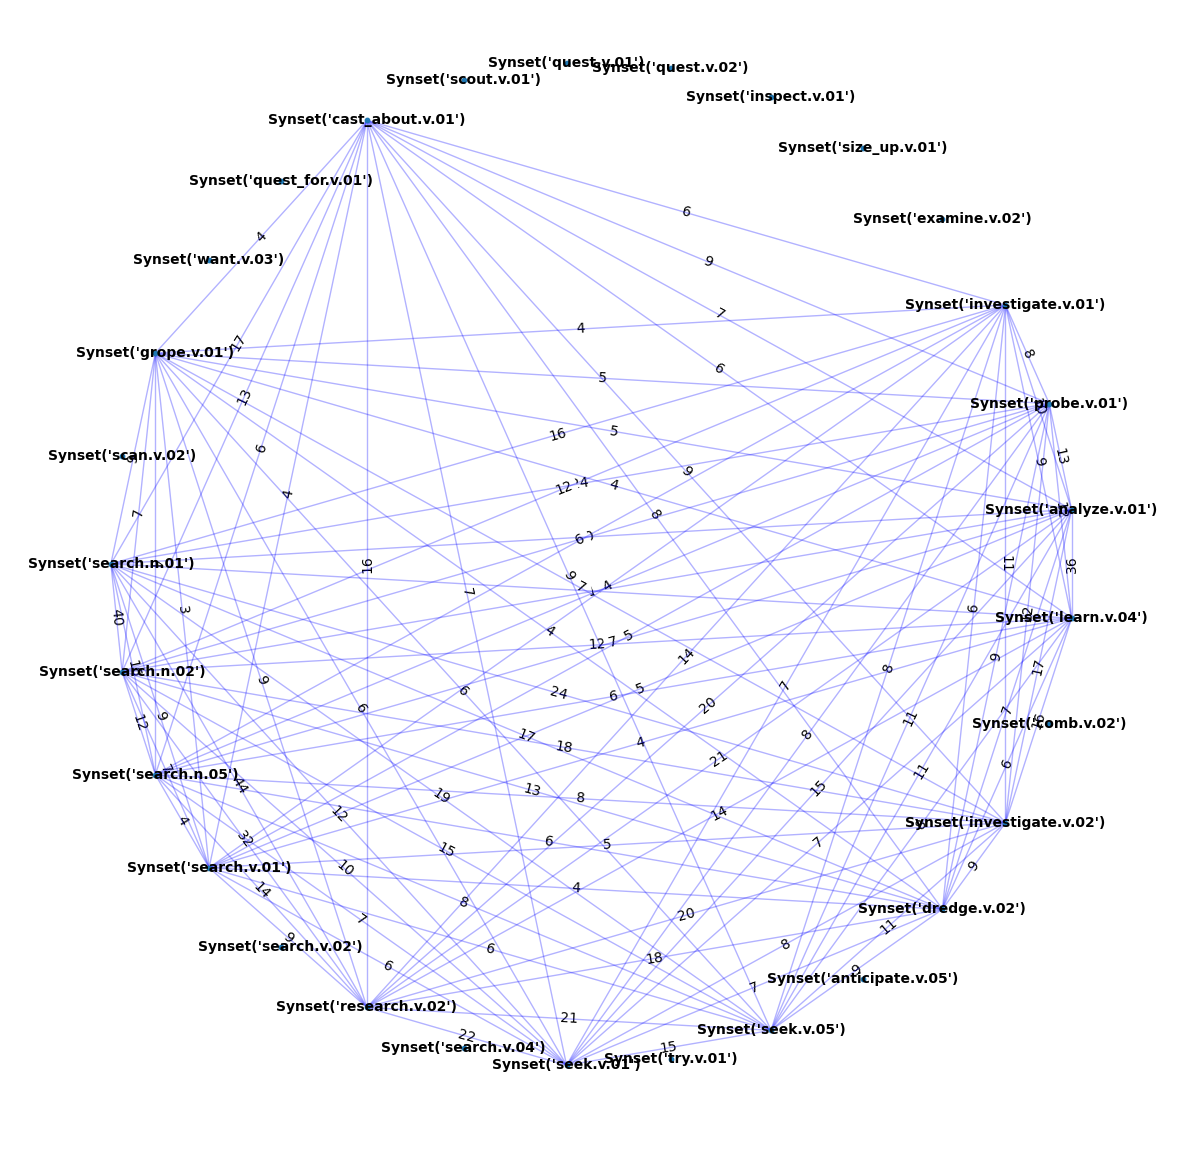

In [276]:
import matplotlib.pyplot as plt 

# Строим граф
pos=nx.shell_layout(G) 

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(G, pos, node_size=10) 
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='blue')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
plt.axis('off') 
plt.show()

In [277]:
# Сколько получилось связных компонент?
from collections import Counter

components = nx.components.connected_components(G)
nodes = sorted([(i, len(i)) for i in components], key=lambda x: x[1], reverse=True)[0][0]
len(nodes)

15

In [278]:
# Какая у этого графа плотность? 
# Отношение 105 имеющихся рёбер к максимально возможному количеству рёбер
print(nx.density(G))

0.25862068965517243


In [279]:
# Как распределились (взвешенные) степени узлов?
for node in G.nodes():
    print(G.degree(node)/105) # Число ребер для каждого узла, разделенное на общее количество связей в графе

0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.0
0.13333333333333333
0.0
0.13333333333333333
0.0
0.13333333333333333
0.0
0.13333333333333333
0.13333333333333333
0.0
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.13333333333333333
0.0
0.0
0.0
0.0
0.0
0.0
0.13333333333333333
0.0
0.0
0.13333333333333333
0.0


In [280]:
# Какие узлы оказались центральными (degree centrality)?
deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

Synset('search.n.01')
Synset('search.n.02')
Synset('search.n.05')
Synset('search.v.01')
Synset('research.v.02')
Synset('seek.v.01')
Synset('seek.v.05')
Synset('dredge.v.02')
Synset('investigate.v.02')
Synset('learn.v.04')
Synset('analyze.v.01')
Synset('probe.v.01')
Synset('investigate.v.01')
Synset('cast_about.v.01')
Synset('grope.v.01')
Synset('search.v.02')
Synset('search.v.04')
Synset('try.v.01')
Synset('anticipate.v.05')
Synset('comb.v.02')
Synset('examine.v.02')
Synset('size_up.v.01')
Synset('inspect.v.01')
Synset('quest.v.02')
Synset('quest.v.01')
Synset('scout.v.01')
Synset('quest_for.v.01')
Synset('want.v.03')
Synset('scan.v.02')


In [281]:
# Какие узлы оказались центральными (eigencentrality)?
b = nx.eigenvector_centrality(G)
for nodeid in sorted(b, key=b.get, reverse=True):
    print(nodeid)

Synset('search.n.01')
Synset('search.n.02')
Synset('search.n.05')
Synset('search.v.01')
Synset('research.v.02')
Synset('seek.v.01')
Synset('seek.v.05')
Synset('dredge.v.02')
Synset('investigate.v.02')
Synset('learn.v.04')
Synset('analyze.v.01')
Synset('probe.v.01')
Synset('investigate.v.01')
Synset('cast_about.v.01')
Synset('grope.v.01')
Synset('search.v.02')
Synset('search.v.04')
Synset('try.v.01')
Synset('anticipate.v.05')
Synset('comb.v.02')
Synset('examine.v.02')
Synset('size_up.v.01')
Synset('inspect.v.01')
Synset('quest.v.02')
Synset('quest.v.01')
Synset('scout.v.01')
Synset('quest_for.v.01')
Synset('want.v.03')
Synset('scan.v.02')


Результаты, которые дали обе метрики, абсолютно совпадают. Центральными узлами оказались все 29 узлов, которые и присутствуют на графе. Это же хорошо, да?

In [282]:
# Сообщества (1)

from networkx.algorithms import community

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
print(sorted(map(sorted, top_level_communities)))

[[Synset('analyze.v.01'), Synset('cast_about.v.01'), Synset('dredge.v.02'), Synset('grope.v.01'), Synset('investigate.v.01'), Synset('investigate.v.02'), Synset('learn.v.04'), Synset('probe.v.01'), Synset('research.v.02'), Synset('search.n.02'), Synset('search.n.05'), Synset('search.v.01'), Synset('seek.v.01'), Synset('seek.v.05')], [Synset('anticipate.v.05')], [Synset('comb.v.02')], [Synset('examine.v.02')], [Synset('inspect.v.01')], [Synset('quest.v.01')], [Synset('quest.v.02')], [Synset('quest_for.v.01')], [Synset('scan.v.02')], [Synset('scout.v.01')], [Synset('search.n.01')], [Synset('search.v.02')], [Synset('search.v.04')], [Synset('size_up.v.01')], [Synset('try.v.01')], [Synset('want.v.03')]]


In [283]:
# Сообщества (2)
communities_generator_2 = community.greedy_modularity_communities(G)
communities_generator_2

[frozenset({Synset('analyze.v.01'),
            Synset('cast_about.v.01'),
            Synset('dredge.v.02'),
            Synset('grope.v.01'),
            Synset('investigate.v.01'),
            Synset('investigate.v.02'),
            Synset('learn.v.04'),
            Synset('probe.v.01'),
            Synset('research.v.02'),
            Synset('search.n.01'),
            Synset('search.n.02'),
            Synset('search.n.05'),
            Synset('search.v.01'),
            Synset('seek.v.01'),
            Synset('seek.v.05')}),
 frozenset({Synset('search.v.02')}),
 frozenset({Synset('search.v.04')}),
 frozenset({Synset('try.v.01')}),
 frozenset({Synset('anticipate.v.05')}),
 frozenset({Synset('comb.v.02')}),
 frozenset({Synset('examine.v.02')}),
 frozenset({Synset('size_up.v.01')}),
 frozenset({Synset('inspect.v.01')}),
 frozenset({Synset('quest.v.02')}),
 frozenset({Synset('quest.v.01')}),
 frozenset({Synset('scout.v.01')}),
 frozenset({Synset('quest_for.v.01')}),
 frozenset({Synse

Первый алгоритм убирает постепенно по ребру с наиболее высокой between centrality, а второй - использует модулярность, которая в свою очередь опирается на плотность связей внутри группы. В первом сообществе на основе первого алгоритма нет Synset('search.n.01'), хотя в первом сообществе на основе второго алгоритма он есть. Далее оба алгоритма выделяют сообщества, состоящие только из одного синсета, но закономерности моментами прослеживаются. В большей степени отличатся только порядок выдачи, а не сами итоговые элементы. 

### Граф №2

In [284]:
# Удаление лишних синсетов
filtered_synsets_2 = []

for synset in all_synsets:
    if all_synsets.count(synset) > 5:
        filtered_synsets_2.append(synset)
        
print (filtered_synsets_2)

[Synset('search.n.02'), Synset('search.v.01'), Synset('search.v.02'), Synset('research.v.02'), Synset('search.v.04'), Synset('seek.v.01'), Synset('search.v.01'), Synset('try.v.01'), Synset('search.v.01'), Synset('search.v.01'), Synset('search.n.02'), Synset('dredge.v.02'), Synset('search.v.01'), Synset('search.v.04'), Synset('investigate.v.02'), Synset('search.v.01'), Synset('comb.v.02'), Synset('search.v.01'), Synset('search.v.04'), Synset('search.v.01'), Synset('search.v.04'), Synset('search.v.01'), Synset('search.v.04'), Synset('investigate.v.02'), Synset('probe.v.01'), Synset('investigate.v.01'), Synset('search.v.01'), Synset('search.v.04'), Synset('size_up.v.01'), Synset('try.v.01'), Synset('investigate.v.01'), Synset('search.v.01'), Synset('search.v.04'), Synset('search.v.01'), Synset('search.v.04'), Synset('search.v.01'), Synset('try.v.01'), Synset('search.v.01'), Synset('search.v.04'), Synset('probe.v.01'), Synset('search.v.01'), Synset('search.v.04'), Synset('search.v.01'), Sy

In [285]:
# Убираем дубликаты
final_synsets_2 = []
for synset in filtered_synsets_2:
    if synset not in final_synsets_2:
        final_synsets_2.append(synset)

print(final_synsets_2)

[Synset('search.n.02'), Synset('search.v.01'), Synset('search.v.02'), Synset('research.v.02'), Synset('search.v.04'), Synset('seek.v.01'), Synset('try.v.01'), Synset('dredge.v.02'), Synset('investigate.v.02'), Synset('comb.v.02'), Synset('probe.v.01'), Synset('investigate.v.01'), Synset('size_up.v.01'), Synset('inspect.v.01'), Synset('quest.v.01'), Synset('want.v.03')]


In [286]:
# Создаём узлы
import networkx as nx
G_2 = nx.Graph() 
G_2.add_nodes_from(final_synsets_2)

In [287]:
filtered_edges_2 = []
for x in synsets_by_lemma.values():
    a = []
    for y in x:
        if y in final_synsets_2:
            a.append(y)
    filtered_edges_2.append(a)
    
print(filtered_edges_2)

[[Synset('search.n.02'), Synset('search.v.01'), Synset('search.v.02'), Synset('research.v.02'), Synset('search.v.04')], [Synset('seek.v.01'), Synset('search.v.01'), Synset('try.v.01')], [Synset('search.v.01')], [Synset('search.v.01')], [Synset('search.n.02'), Synset('dredge.v.02'), Synset('search.v.01'), Synset('search.v.04')], [Synset('investigate.v.02'), Synset('search.v.01'), Synset('comb.v.02')], [Synset('search.v.01'), Synset('search.v.04')], [Synset('search.v.01'), Synset('search.v.04')], [Synset('search.v.01'), Synset('search.v.04')], [Synset('investigate.v.02'), Synset('probe.v.01'), Synset('investigate.v.01'), Synset('search.v.01'), Synset('search.v.04'), Synset('size_up.v.01'), Synset('try.v.01')], [Synset('investigate.v.01'), Synset('search.v.01'), Synset('search.v.04')], [Synset('search.v.01'), Synset('search.v.04')], [Synset('search.v.01'), Synset('try.v.01')], [Synset('search.v.01'), Synset('search.v.04')], [Synset('probe.v.01'), Synset('search.v.01'), Synset('search.v.04

In [288]:
# Добавляем ребра
for i in range(len(filtered_edges_2)):
    for j in range(i+1, len(filtered_edges_2)):
        count = 0
        for s1 in filtered_edges_2[i]:
            for s2 in filtered_edges_2[j]:
                count += len(set(s1.lemma_names()).intersection(s2.lemma_names()))
        if count > 0:
            if filtered_edges_2[i][0] != filtered_edges_2[j][0]:
                G_2.add_edge(filtered_edges_2[i][0], filtered_edges_2[j][0], weight=count)

In [289]:
# Посчитаем рёбра и посмотрим на них отдельно
c = 0
for edge in G_2.edges(data=True):
    c += 1
    print(c, edge)

1 (Synset('search.n.02'), Synset('seek.v.01'), {'weight': 9})
2 (Synset('search.n.02'), Synset('search.v.01'), {'weight': 13})
3 (Synset('search.n.02'), Synset('investigate.v.02'), {'weight': 7})
4 (Synset('search.n.02'), Synset('investigate.v.01'), {'weight': 12})
5 (Synset('search.n.02'), Synset('probe.v.01'), {'weight': 20})
6 (Synset('search.n.02'), Synset('dredge.v.02'), {'weight': 13})
7 (Synset('search.n.02'), Synset('research.v.02'), {'weight': 27})
8 (Synset('search.v.01'), Synset('seek.v.01'), {'weight': 6})
9 (Synset('search.v.01'), Synset('investigate.v.02'), {'weight': 4})
10 (Synset('search.v.01'), Synset('investigate.v.01'), {'weight': 6})
11 (Synset('search.v.01'), Synset('probe.v.01'), {'weight': 9})
12 (Synset('search.v.01'), Synset('dredge.v.02'), {'weight': 7})
13 (Synset('search.v.01'), Synset('research.v.02'), {'weight': 14})
14 (Synset('research.v.02'), Synset('seek.v.01'), {'weight': 18})
15 (Synset('research.v.02'), Synset('investigate.v.02'), {'weight': 8})
16

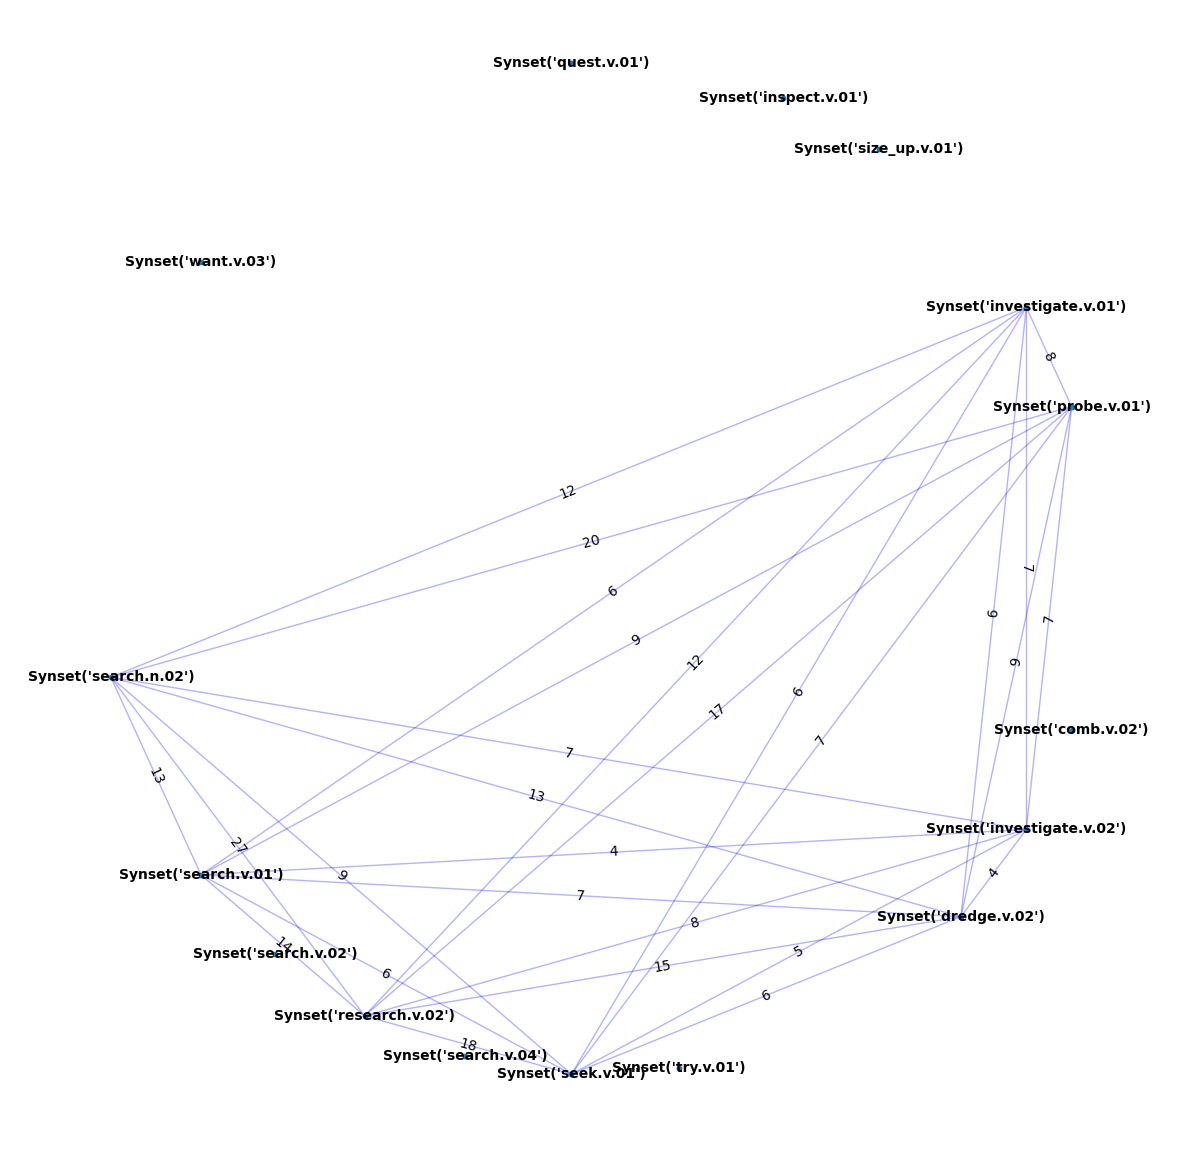

In [290]:
# Строим граф
pos=nx.shell_layout(G) 

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(G_2, pos, node_size=10) 
labels = nx.get_edge_attributes(G_2,'weight')
nx.draw_networkx_edge_labels(G_2, pos, edge_labels=labels)
nx.draw_networkx_edges(G_2, pos, alpha=0.3, edge_color='blue')
nx.draw_networkx_labels(G_2, pos, font_size=10, font_weight='bold')
plt.axis('off') 
plt.show()

In [291]:
# Сколько получилось связных компонент?
from collections import Counter

components = nx.components.connected_components(G_2)
nodes = sorted([(i, len(i)) for i in components], key=lambda x: x[1], reverse=True)[0][0]
len(nodes)

8

In [292]:
# Какая у этого графа плотность? 
# Отношение имеющихся рёбер к максимально возможному количеству рёбер
print(nx.density(G_2))

0.23333333333333334


In [293]:
# Как распределились (взвешенные) степени узлов?
for node in G_2.nodes():
    print(G_2.degree(node)/28) # Число ребер для каждого узла, разделенное на общее количество связей в графе

0.25
0.25
0.0
0.25
0.0
0.25
0.0
0.25
0.25
0.0
0.25
0.25
0.0
0.0
0.0
0.0


In [294]:
# Какие узлы оказались центральными (degree centrality)?
deg = nx.degree_centrality(G_2)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

Synset('search.n.02')
Synset('search.v.01')
Synset('research.v.02')
Synset('seek.v.01')
Synset('dredge.v.02')
Synset('investigate.v.02')
Synset('probe.v.01')
Synset('investigate.v.01')
Synset('search.v.02')
Synset('search.v.04')
Synset('try.v.01')
Synset('comb.v.02')
Synset('size_up.v.01')
Synset('inspect.v.01')
Synset('quest.v.01')
Synset('want.v.03')


In [295]:
# Какие узлы оказались центральными (eigencentrality)?
b = nx.eigenvector_centrality(G_2)
for nodeid in sorted(b, key=b.get, reverse=True):
    print(nodeid)

Synset('search.n.02')
Synset('search.v.01')
Synset('research.v.02')
Synset('seek.v.01')
Synset('dredge.v.02')
Synset('investigate.v.02')
Synset('probe.v.01')
Synset('investigate.v.01')
Synset('search.v.02')
Synset('search.v.04')
Synset('try.v.01')
Synset('comb.v.02')
Synset('size_up.v.01')
Synset('inspect.v.01')
Synset('quest.v.01')
Synset('want.v.03')


Результаты опять идентичны...

In [296]:
# Сообщества (1)

communities_generator = community.girvan_newman(G_2)
top_level_communities = next(communities_generator)
print(sorted(map(sorted, top_level_communities)))

[[Synset('comb.v.02')], [Synset('dredge.v.02'), Synset('investigate.v.01'), Synset('investigate.v.02'), Synset('probe.v.01'), Synset('research.v.02'), Synset('search.v.01'), Synset('seek.v.01')], [Synset('inspect.v.01')], [Synset('quest.v.01')], [Synset('search.n.02')], [Synset('search.v.02')], [Synset('search.v.04')], [Synset('size_up.v.01')], [Synset('try.v.01')], [Synset('want.v.03')]]


In [297]:
# Сообщества (2)
communities_generator_2 = community.greedy_modularity_communities(G_2)
communities_generator_2

[frozenset({Synset('dredge.v.02'),
            Synset('investigate.v.01'),
            Synset('investigate.v.02'),
            Synset('probe.v.01'),
            Synset('research.v.02'),
            Synset('search.n.02'),
            Synset('search.v.01'),
            Synset('seek.v.01')}),
 frozenset({Synset('search.v.02')}),
 frozenset({Synset('search.v.04')}),
 frozenset({Synset('try.v.01')}),
 frozenset({Synset('comb.v.02')}),
 frozenset({Synset('size_up.v.01')}),
 frozenset({Synset('inspect.v.01')}),
 frozenset({Synset('quest.v.01')}),
 frozenset({Synset('want.v.03')})]

Картина очень похожа на ту, которую давал анализ предыдущего графа, но теперь в первых сообществах обоих алгоритмов больше отличий. После одного большого сообщества оба алгоритма выдают несколько единичных синсетов, но чередуется скорее только их порядок, а не сами выданные элементы. 

Безусловно, второй граф даёт нам более устойчивые связи, поэтому для каких-то обособлений доверять лучше ему. Но более содержательным является всё же первый граф, потому что он минимально удаляет шумы, но при этом всё ещё позволяет нам замечать интерсные и более редкие связи.